# HingeLoss

$ hinge(x) = max(0,-Y < \textbf{X,W}>) $

$ X \in \mathbb{R}^{nxm} $
$ Y \in \mathbb{R}^{nx1} $
$ W \in \mathbb{R}^{mx1} $

In [54]:
import arftools
import numpy as np
import matplotlib.pyplot as plt

def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.show()
    
def char(character,datax,datay):
    return datax[datay==character],datay[datay==character]

fn_usps_train = 'USPS_train.txt'
fn_usps_test = 'USPS_test.txt'

trainx,trainy = load_usps(fn_usps_train)
testx,testy = load_usps(fn_usps_test)


In [55]:
def hinge_loss(X,Y,W):
    CW = -Y*X.dot(W.T)
    Zeros = np.zeros(Y.shape)
    return np.maximum(Zeros,CW)
    
def hinge_loss_grad(X,Y,W):
    indicatrice = np.sign(hinge_loss(X,Y,W))
    NablaCW = indicatrice*-Y*X
    return NablaCW

class Perceptron(object):
    def __init__(self,loss,loss_g,max_iter=100,eps=0.1):
        self.max_iter, self.eps = max_iter,eps
        self.w = None
        self.w_histo,self.loss_histo = [],[]
        self.loss = loss
        self.loss_g = loss_g
        
    def fit(self,datax,datay):
        datay = datay.reshape(-1,1)
        N = len(datay) # Number of data points
        datax = datax.reshape(N,-1)
        D = datax.shape[1] # dimension of data points
        self.w = np.random.random((1,D))
        self.w_histo = []
        self.loss_histo = []
        for i in range(self.max_iter):
            self.w_histo += [self.w]
            CW = self.loss(datax,datay,self.w)
            self.loss_histo += [np.sum(CW)]            
            CW_grad = self.loss_g(datax,datay,self.w)
            #print CW_grad
            collective_grad = np.sum(CW_grad,axis=0) # par ligne
            #print collective_grad
            #print  self.w
            self.w -= collective_grad*self.eps
            
    def fit_with_bias(self,datax,datay):
        datay = datay.reshape(-1,1)
        N = len(datay) # Number of data points
        homogeneus = np.ones((N,1))
        datax = datax.reshape(N,-1)
        datax = np.hstack((datax,homogeneus))
        D = datax.shape[1] # dimension of data points
        self.w = np.random.random((1,D))
        self.w_histo = []
        self.loss_histo = []
        for i in range(self.max_iter):
            self.w_histo += [self.w]
            CW = self.loss(datax,datay,self.w)
            self.loss_histo += [np.sum(CW)]            
            CW_grad = self.loss_g(datax,datay,self.w)
            #print CW_grad
            collective_grad = np.sum(CW_grad,axis=0) # par ligne
            self.w -= collective_grad*self.eps
            
    def predict(self,datax):
        return np.sign(datax.dot(self.w.T))
    
    def predict_proba(self,datax):
        return datax.dot(self.w.T)
    
    def predict_with_bias(self,datax):
        N = datax.shape[0] # Number of data points
        homogeneus = np.ones((N,1))
        datax = datax.reshape(N,-1)
        datax = np.hstack((datax,homogeneus))
        return np.sign(datax.dot(self.w.T))
    
    def score(self,datax,datay):
        return np.mean(self.predict(datax).T[0]==datay)
    
    def score_with_bias(self,datax,datay):
        N = datax.shape[0] # Number of data points
        homogeneus = np.ones((N,1))
        datax = datax.reshape(N,-1)
        datax = np.hstack((datax,homogeneus))
        return np.mean(self.predict(datax).T[0]==datay)


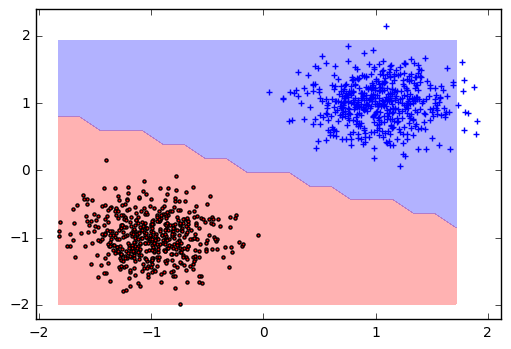

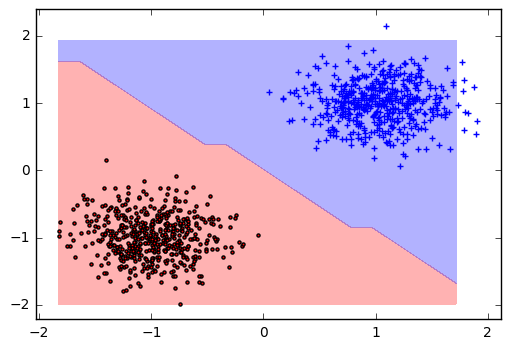

In [56]:
datax,datay = arftools.gen_arti()

my_perceptron = Perceptron(hinge_loss,hinge_loss_grad)

my_perceptron.fit(datax,datay)
arftools.plot_frontiere(datax,my_perceptron.predict)
arftools.plot_data(datax,datay)
plt.show()

my_perceptron.fit_with_bias(datax,datay)
arftools.plot_frontiere(datax,my_perceptron.predict_with_bias)
arftools.plot_data(datax,datay)
plt.show()


In [103]:
def gaussian_function(mu,sigma,K):
    def func(x):
        return K*np.exp(-(np.dot((mu-x).T,(mu-x)))/sigma)
    return func

def projection_gaussien(datax,sigma,K):
    D = datax.shape[0]
    projected_data = np.zeros((D,D))
    for i in range(D):
        projected_data[i,:] = np.array(map(gaussian_function(datax[i,:],sigma,K),datax))
    return projected_data

def projection_gaussien_grid(grid_space,datax,sigma,K):
    N = grid_space.shape[0]
    D = datax.shape[0]
    projected_data = np.zeros((N,D))
    for i in range(N):
        projected_data[i,:] = np.array(map(gaussian_function(grid_space[i,:],sigma,K),datax))
    return projected_data

datax,datay = arftools.gen_arti()
sigma = 1
K = 0.3
projected_data = projection_gaussien(datax,sigma,K)
grid_space,xx,yy = arftools.make_grid(datax)
projected_grid_space = projection_gaussien_grid(grid_space,datax,sigma,K)


1.0
400
400
400
(400L, 1L)


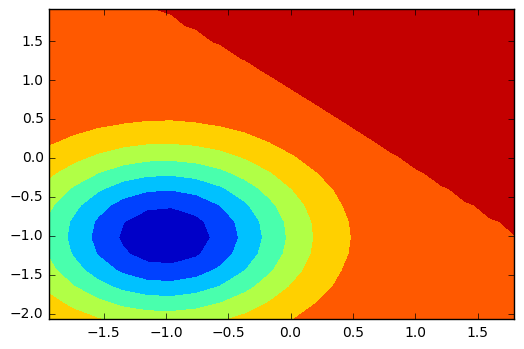

In [104]:
my_perceptron.fit(projected_data,datay)
print my_perceptron.score(projected_data,datay)
projected_grid_space_proba = my_perceptron.predict_proba(projected_grid_space)

print len(grid_space[:,0])
print len(grid_space[:,1])
print len(projected_grid_space_proba[:,0])
print projected_grid_space_proba.shape
plt.contourf(xx, yy, projected_grid_space_proba.reshape(yy.shape))
plt.show()

In [41]:
#1vsmany

fn_usps_train = 'USPS_train.txt'
fn_usps_test = 'USPS_test.txt'

trainx,trainy = load_usps(fn_usps_train)
testx,testy = load_usps(fn_usps_test)

my_perceptron = Perceptron(hinge_loss,hinge_loss_grad)
classes = 10
scores = np.zeros((classes,classes))
for i in range(classes):
    for j in range(classes):
        datax = None
        datay = None
        if not i==j:
            ch0x,ch0y = char(i,trainx,trainy)
            ch1x,ch1y = char(j,trainx,trainy) 
            datax = np.vstack((ch0x,ch1x))
            datay = np.hstack((np.zeros(ch1y.shape)-1,np.zeros(ch0y.shape)+1))
    
            my_perceptron.fit_with_bias(datax,datay)
            scores[i,j] = my_perceptron.score_with_bias(datax,datay)
print scores


SyntaxError: invalid syntax (<ipython-input-41-459dd6776870>, line 23)

In [120]:
def sigmoide(x):
    return 1/(1-np.exp(-x))

def soille(x,s): 
    return 1 if (x>s) else -1

w_0 = np.zeros((2,2)) +1
w_1 = np.array([1,-1])
s1 = 0.5
s2 = 1.5
s3 = 1

x_0 =  np.ones(2)
x_1 = w_0.dot(x_0.T)
x_1 = np.array([ soille(x_1[0],s1), soille(x_1[1],s2) ])
print x_1

x_2 = soille(w_1.dot(x_1.T),s3)

print x_2


[ 1.  1.]
[1 1]
-1
